# **Laboratorijska vježba 8**: Zadaci za samostalni rad

## **Klasifikacija zrna pšenice**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o zrnima triju različitih sorti pšenice: Kama, Rosa i Kanadska. Za svaku klasu snimljen je popriličan broj slika tehnikom mekih rendgenskih zraka. Iz slika su izvučene značajke koje opisuju oblik zrna.


In [ ]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
seeds = pd.read_csv("Data/seeds.csv")
seeds.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## **Zadatak 1: Priprema skupa podataka**

Predobradite skup podataka na način da zadržite samo smislene značajke. Iscrtajte histogram vrijednosti za svaku značajku.

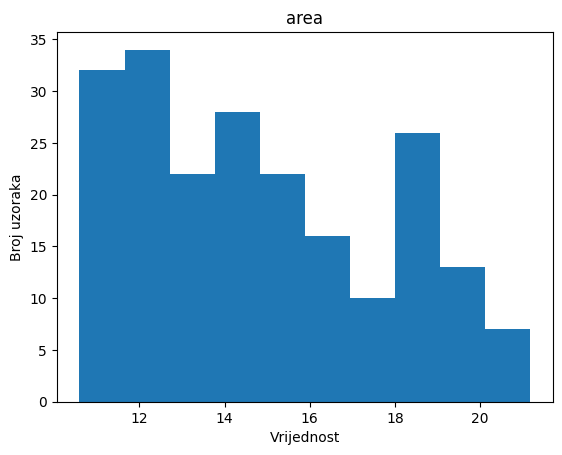

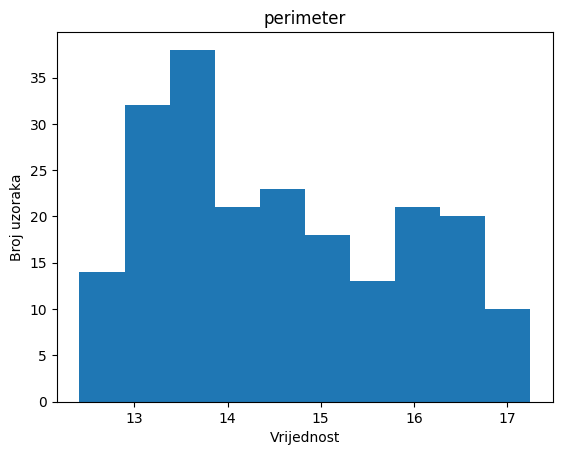

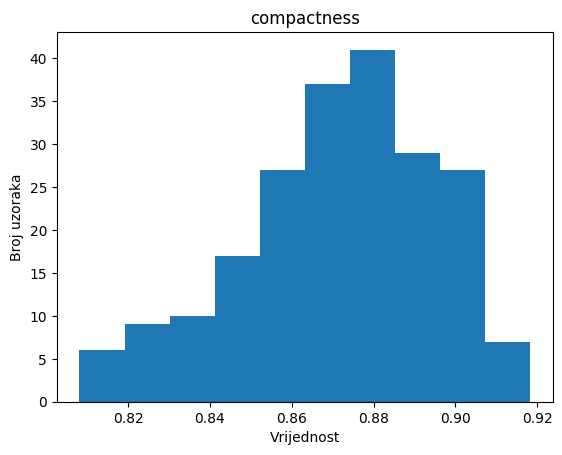

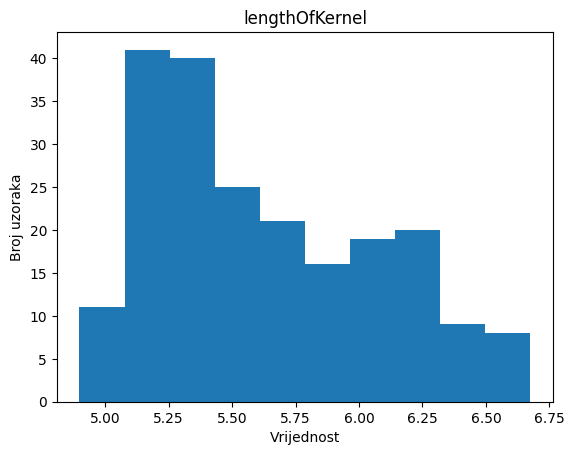

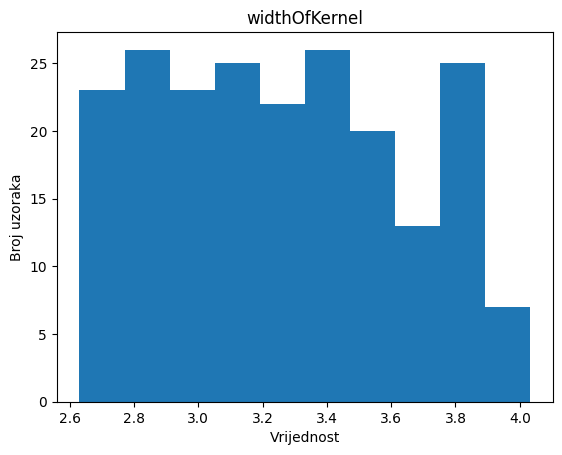

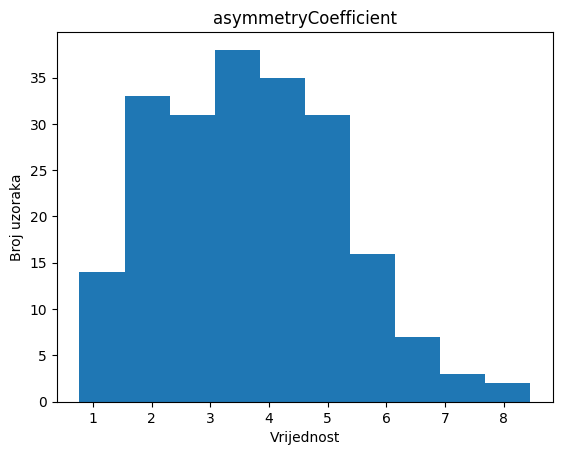

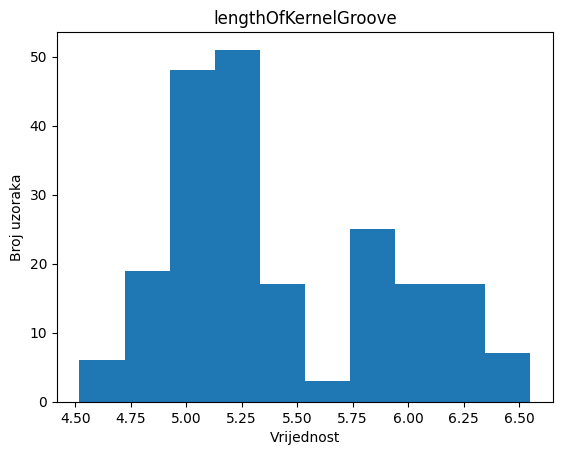

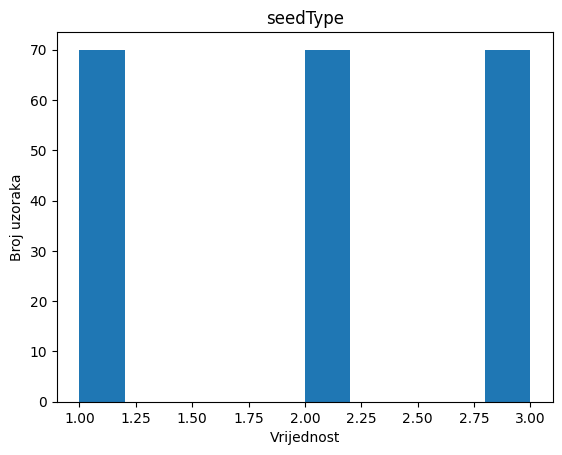

In [ ]:
#Izbacit ćemo stupac ID 

relevantne_znacajke = seeds.drop(["ID"], axis=1)

for column in relevantne_znacajke.columns[:]:
    plt.figure()
    plt.hist(relevantne_znacajke[column], bins=10)  
    plt.title(column)
    plt.xlabel('Vrijednost')
    plt.ylabel('Broj uzoraka')
    plt.show()

S obzirom na to da značajke imaju različite intervale vrijednosti, poželjno ih je normalizirati. Normalizirajte značajke prigodnom metodom normalizacije. 

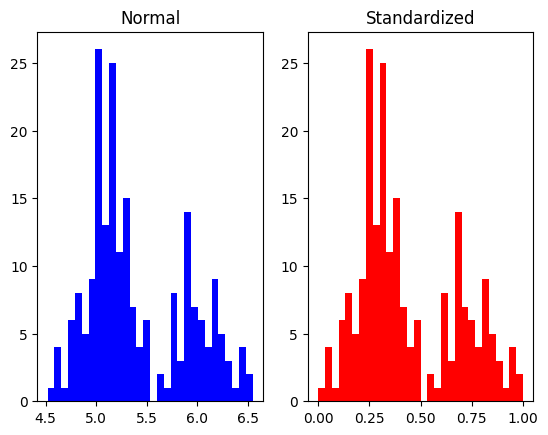

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalizirane_znacajke = scaler.fit_transform(relevantne_znacajke)
normalizirani_data = pd.DataFrame(normalizirane_znacajke, columns=relevantne_znacajke.columns)

plt.subplot(1, 2, 1)
plt.hist(relevantne_znacajke['lengthOfKernelGroove'], bins=30, color='b')
plt.title("Normal")

plt.subplot(1, 2, 2)
plt.hist(normalizirani_data['lengthOfKernelGroove'], bins=30, color='r')
plt.title("Standardized")

plt.show()

## **Zadatak 2: Grupiranje pomoću algoritma $k$-means**

Pomoću metode lakta pronađite najprikladniju vrijednost za parametar $k$ u algoritmu $k$-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

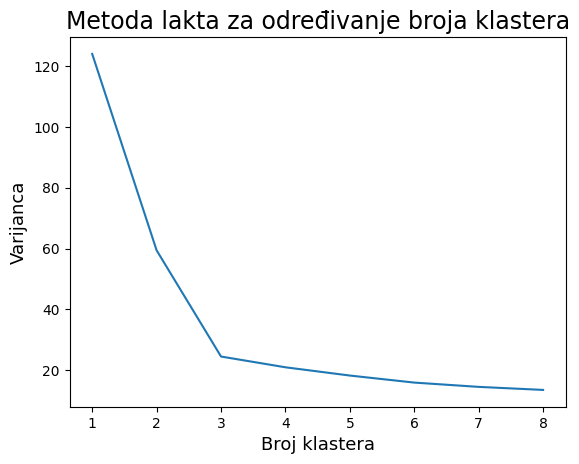

In [ ]:
variances = []

for num_clusters in range (1, 9):
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans.fit(normalizirane_znacajke)
    variances.append(kmeans.inertia_)

plt.plot(range(1, 9), variances)
plt.xlabel('Broj klastera', size=13)
plt.ylabel('Varijanca', size=13)
plt.title('Metoda lakta za određivanje broja klastera', size=17)
plt.show()

## **Zadatak 3: Vizualizacija grupa algoritma $k$-means**

Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente.  

In [ ]:
seeds_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(normalizirani_data)
seeds_embedded.shape

#Ispis (210, 2) -- Sveli smo skup podataka na dvije komponente, 210 broj redaka

(210, 2)

Zatim grupirajte skup podataka pomoću algoritma $k$-means, gdje za parametar $k$ koristite najbolju vrijednost iz prošlog zadatka.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


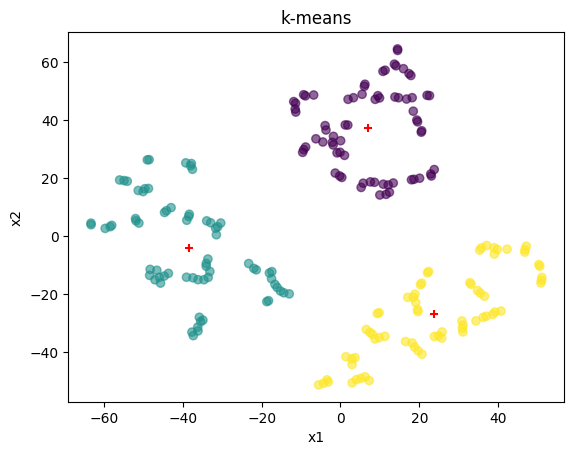

In [ ]:
kmean = KMeans(n_clusters=3, random_state=42).fit(seeds_embedded)
marks_predicted=kmean.predict(seeds_embedded)

plt.scatter(seeds_embedded[:,0], seeds_embedded[:,1], c=kmean.labels_, alpha=0.6)
plt.title("k-means")
plt.xlabel("x1")
plt.ylabel("x2")
for c in kmean.cluster_centers_:
  plt.scatter(c[0], c[1], marker="+", color="red")

Pomoću dva dijagrama raspršenosti vizualizirajte skup podataka prije (s poznatim oznakama klasa) i nakon grupiranja (s novododanim oznakama grupa). 

Text(0, 0.5, 'x2')

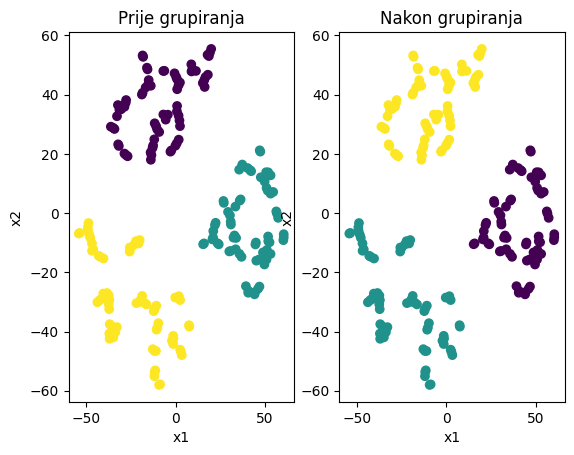

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(seeds_embedded[:,0],seeds_embedded[:,1], c=normalizirani_data['seedType'])
ax2.scatter(seeds_embedded[:,0],seeds_embedded[:,1], c=marks_predicted)
ax1.set_title('Prije grupiranja')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax2.set_title('Nakon grupiranja')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')


# **Klasifikacija sorti vina**

U ovoj laboratorijskoj vježbi također ćemo istražiti skup podataka koji sadrži podatke o različitim sortama vina. Skup podataka sadrži značajke koje predstavljaju rezultate kemijske analize vina uzgojenih u istoj regiji u Italiji, ali koja potječu od tri različite sorte. Kemijskom analizom su utvrđene količine 13 sastojaka koji se nalaze u svakoj od tri vrste vina.


In [ ]:
wines = pd.read_csv("Data/wine.csv")
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **Zadatak 4: Grupiranje pomoću algoritma $k$-means**

U skupu podataka retci nemaju oznake. Pomoću algoritma $k$-means grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa. Provjerite ima li normalizacija značajki utjecaj na performanse algoritma $k$-means.



In [ ]:
std_scaler = StandardScaler()
wines_s = std_scaler.fit_transform(wines)
wines_s = pd.DataFrame(wines_s, columns=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline'])
wines_s.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

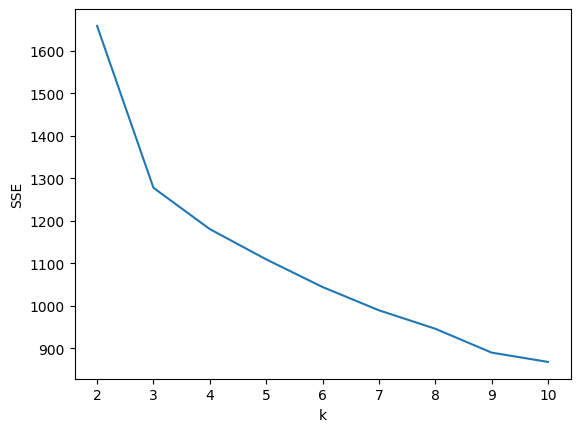

In [ ]:
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    plt.plot(sse.k, sse.sse)
    plt.xlabel("k")
    plt.ylabel("SSE")
    
plot_sse(wines_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Silhouette score')

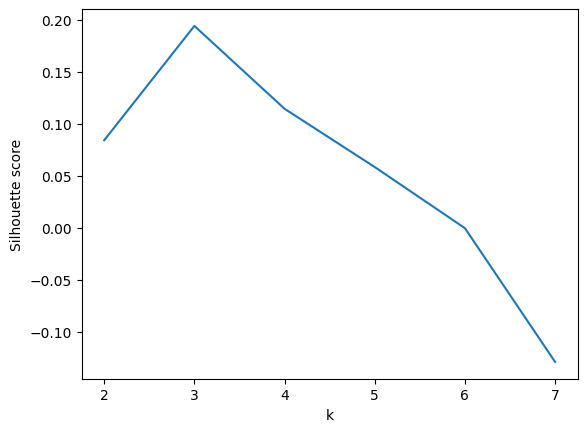

In [ ]:
silhouettes = []

for k in range(2, 8):
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(wines_s)
    score = silhouette_score(wines, labels)
    silhouettes.append({"k": k, "score": score})
    
silhouettes = pd.DataFrame(silhouettes)

plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("k")
plt.ylabel("Silhouette score")

In [ ]:
#Nakon standardizacije pomoću metoda leakta i metoda siluete, možemo vidjeti da je optimalan k=3
#Prije standardizacije se nije moglo odrediti.

In [ ]:
kmean = KMeans(n_clusters=3, random_state=42).fit(wines_s)
wines_s['Mark']=kmean.predict(wines_s)
wines_s.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Mark
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

In [ ]:
wine_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(wines_s)
wine_embedded.shape

(178, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


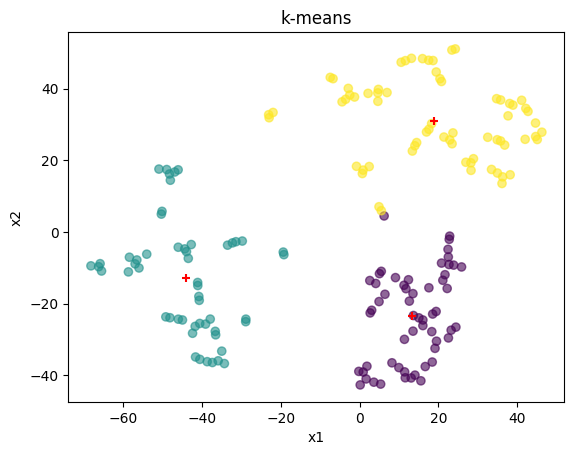

In [ ]:
kmean = KMeans(n_clusters=3, random_state=42).fit(wine_embedded)
plt.scatter(wine_embedded[:,0], wine_embedded[:,1], c=kmean.labels_, alpha=0.6)
plt.title("k-means")
plt.xlabel("x1")
plt.ylabel("x2")
for c in kmean.cluster_centers_:
  plt.scatter(c[0], c[1], marker="+", color="red")

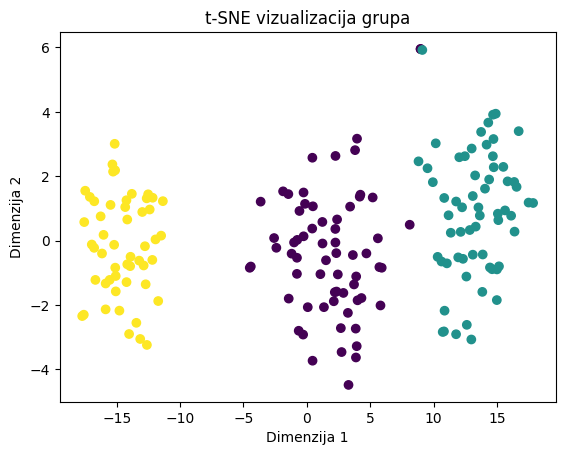

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
smanjene_znacajke = tsne.fit_transform(wines_s)

plt.scatter(smanjene_znacajke[:,0], smanjene_znacajke[:,1], c=wines_s['Mark'])
plt.xlabel('Dimenzija 1')
plt.ylabel('Dimenzija 2')
plt.title('t-SNE vizualizacija grupa')
plt.show()

## **Zadatak 5: Grupiranje pomoću algoritma DBSCAN**

U skupu podataka retci nemaju oznake. Pomoću algoritma DBSCAN grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa.



Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

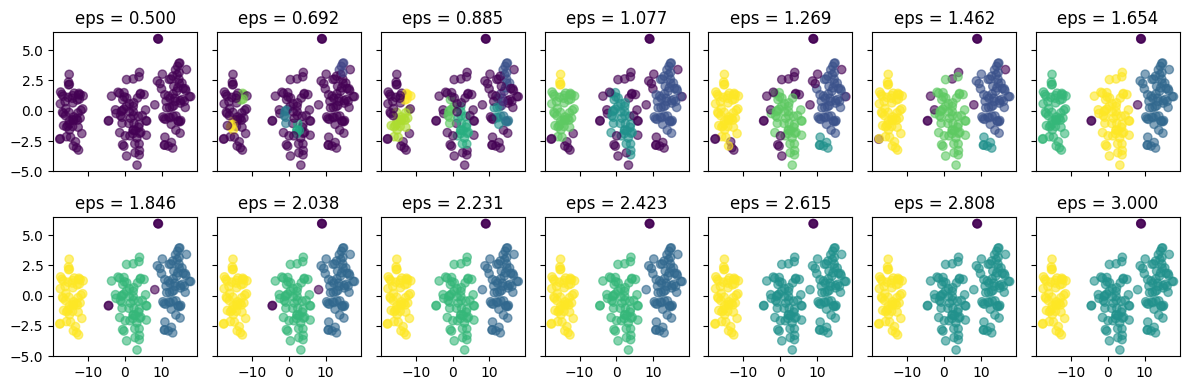

In [ ]:
eps_list = np.linspace(0.5, 3, 14)

COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)
labels=[]
for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(smanjene_znacajke)
    ax.scatter(smanjene_znacajke[:,0], smanjene_znacajke[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

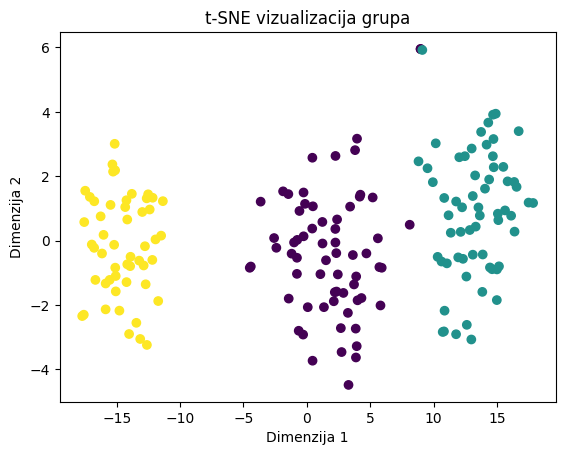

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
smanjene_znacajke = tsne.fit_transform(wines_s)

plt.scatter(smanjene_znacajke[:,0], smanjene_znacajke[:,1], c=wines_s['Mark'])
plt.xlabel('Dimenzija 1')
plt.ylabel('Dimenzija 2')
plt.title('t-SNE vizualizacija grupa')
plt.show()